# dane nieustruktyryzowane

Dane nieustrukturyzowane to dane, które nie są w żaden sposób uporządkowane, takie jak:

- obrazy,
- teksty,
- dźwięki,
- wideo.
  
Niezależnie od typu, wszystko przetwarzamy w tensorach (macierzach wielowymiarowych). To może prowadzić do chęci wykorzystania modeli ML i sieci neuronowych do analizy danych nieustrukturyzowanych.


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="husl")


# 2-dim picture 28 x 28 pixel
picture_2d = np.random.uniform(size=(28,28))
picture_2d[0:5,0:5]

array([[0.51209426, 0.14663302, 0.22121714, 0.05310908, 0.75023721],
       [0.32680599, 0.1005447 , 0.55604465, 0.09762113, 0.94599531],
       [0.03287616, 0.60521745, 0.19558811, 0.7921698 , 0.097081  ],
       [0.98409001, 0.87207277, 0.67522807, 0.71541535, 0.75485835],
       [0.02429088, 0.06016476, 0.89526054, 0.87395299, 0.8126181 ]])

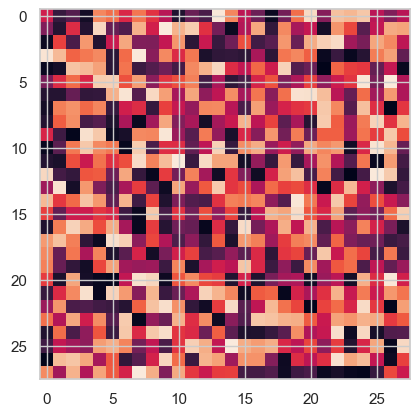

In [2]:
plt.imshow(picture_2d, interpolation='nearest')
plt.show()

## PyTorch - pretrenowane modele klasyfikujące

In [3]:
import urllib.request
url = 'https://pytorch.tips/coffee'
fpath = 'coffee.jpg'
# pobierz na dysk
urllib.request.urlretrieve(url, fpath)

('coffee.jpg', <http.client.HTTPMessage at 0x145c46750>)

In [4]:
import matplotlib.pyplot as plt
from PIL import Image # pillow library

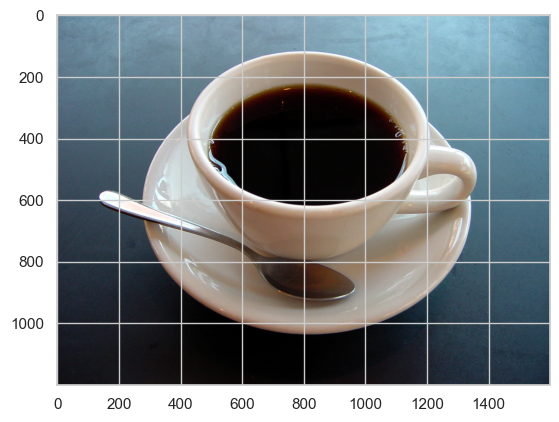

In [5]:
img = Image.open('coffee.jpg')
plt.imshow(img)

In [7]:
import torch
from torchvision import transforms

Odrobinę zmienimy własności obrazka 

In [8]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize( 
    mean = [0.485, 0.456, 0.406],
    std = [0.229, 0.224,0.225])
])

In [9]:
img_tensor = transform(img)

Sprawdzmy rozmiary


In [10]:
type(img_tensor), img_tensor.shape

(torch.Tensor, torch.Size([3, 224, 224]))

In [11]:
# utworzenie batch size - dodatkowego wymiaru (na inne obrazki)
batch = img_tensor.unsqueeze(0)
batch.shape

torch.Size([1, 3, 224, 224])

In [12]:
from torchvision import models

models.list_models()[:5]

['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny']

## Model alexnet

In [13]:
alexnet = models.alexnet(pretrained=True)

/Users/seba/Documents/GitHub/RTA_2025/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/seba/Documents/GitHub/RTA_2025/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /Users/seba/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:03<00:00, 67.9MB/s] 


In [14]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [15]:
alexnet.eval()
predict = alexnet(batch)

In [16]:
_, idx = torch.max(predict,1)

In [17]:
print(idx)

tensor([967])


In [18]:
url = 'https://pytorch.tips/imagenet-labels'
fpath = 'imagenet_class_labels.txt'
urllib.request.urlretrieve(url, fpath)

('imagenet_class_labels.txt', <http.client.HTTPMessage at 0x30aab0490>)

In [19]:
with open('imagenet_class_labels.txt') as f:
    classes = [line.strip() for line in f.readlines()]

In [20]:
classes[0:5]

["{0: 'tench, Tinca tinca',",
 "1: 'goldfish, Carassius auratus',",
 "2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',",
 "3: 'tiger shark, Galeocerdo cuvieri',",
 "4: 'hammerhead, hammerhead shark',"]

In [21]:
prob = torch.nn.functional.softmax(predict, dim=1)[0] *100
prob[:10]

tensor([2.5403e-09, 1.5528e-07, 1.2023e-08, 1.0434e-09, 2.9924e-07, 3.6093e-08,
        8.3350e-10, 1.4222e-11, 1.0724e-10, 1.2831e-10],
       grad_fn=<SliceBackward0>)

In [22]:
classes[idx.item()], prob[idx.item()].item()

("967: 'espresso',", 87.99551391601562)

## Model resnet

In [23]:
resnet = models.resnet101(weights=models.ResNet101_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/resnet101-cd907fc2.pth" to /Users/seba/.cache/torch/hub/checkpoints/resnet101-cd907fc2.pth
100%|██████████| 171M/171M [00:02<00:00, 73.7MB/s] 


In [ ]:
# resnet

In [24]:
resnet.eval()
out = resnet(batch)

In [25]:
_, index = torch.max(out,1)
prob = torch.nn.functional.softmax(out, dim=1)[0] *100

In [26]:
classes[index.item()], prob[index.item()].item()

("967: 'espresso',", 49.123924255371094)

## własny model dla danych graficznych 

Zobaczmy jak sieci neuronowe działają na danych graficznych. 

In [27]:
# 60000 obrazow 28x28

# Loading the Fashion-MNIST dataset
from torchvision import datasets, transforms
# transformacja i normalizacja danych 
transform = transforms.Compose([transforms.ToTensor(),
  transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training data
trainset = datasets.FashionMNIST('MNIST_data/', download = True, train = True, transform = transform)
testset = datasets.FashionMNIST('MNIST_data/', download = True, train = False, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)


100%|██████████| 26.4M/26.4M [00:00<00:00, 48.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 928kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 16.5MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.1MB/s]


In [28]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

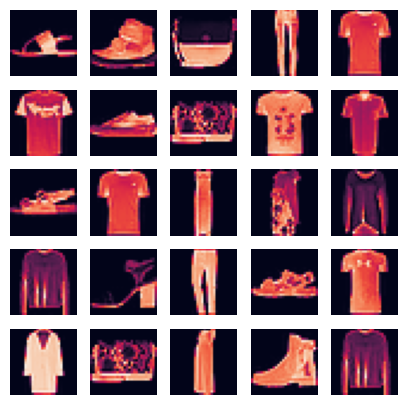

In [29]:
indexes = np.random.randint(0, images.shape[0], size=25)
images_rand = images[indexes]
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    image = images_rand[i]
    plt.imshow(image[0])
    plt.axis('off')

plt.show()
plt.close('all')

Przykładowy model sieci nueronowej (bez konwolucji) - czy sądzisz, że to dobre rozwiązanie? 

In [30]:
# Define the network architecture
from torch import nn, optim
import torch.nn.functional as F

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 10),
                      nn.LogSoftmax(dim = 1)
                     )

# Define the loss
criterion = nn.NLLLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.002)

# Define the epochs
epochs = 30

train_losses, test_losses = [], []

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    # Flatten Fashion-MNIST images into a 784 long vector
    images = images.view(images.shape[0], -1)
    
    # Training pass
    optimizer.zero_grad()
    
    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
  else:
    test_loss = 0
    accuracy = 0
    
    # Turn off gradients for validation, saves memory and computation
    with torch.no_grad():
      # Set the model to evaluation mode
      model.eval()
      
      # Validation pass
      for images, labels in testloader:
        images = images.view(images.shape[0], -1)
        log_ps = model(images)
        test_loss += criterion(log_ps, labels)
        
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim = 1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
    
    model.train()
    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))
    
    print("Epoch: {}/{}..".format(e+1, epochs),
          "Training loss: {:.3f}..".format(running_loss/len(trainloader)),
          "Test loss: {:.3f}..".format(test_loss/len(testloader)),
          "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30.. Training loss: 0.491.. Test loss: 0.417.. Test Accuracy: 0.849
Epoch: 2/30.. Training loss: 0.381.. Test loss: 0.464.. Test Accuracy: 0.832
Epoch: 3/30.. Training loss: 0.347.. Test loss: 0.400.. Test Accuracy: 0.854
Epoch: 4/30.. Training loss: 0.321.. Test loss: 0.391.. Test Accuracy: 0.857
Epoch: 5/30.. Training loss: 0.304.. Test loss: 0.409.. Test Accuracy: 0.856
Epoch: 6/30.. Training loss: 0.293.. Test loss: 0.393.. Test Accuracy: 0.861
Epoch: 7/30.. Training loss: 0.279.. Test loss: 0.386.. Test Accuracy: 0.865
Epoch: 8/30.. Training loss: 0.270.. Test loss: 0.362.. Test Accuracy: 0.879
Epoch: 9/30.. Training loss: 0.260.. Test loss: 0.388.. Test Accuracy: 0.868
Epoch: 10/30.. Training loss: 0.253.. Test loss: 0.376.. Test Accuracy: 0.877
Epoch: 11/30.. Training loss: 0.246.. Test loss: 0.367.. Test Accuracy: 0.879
Epoch: 12/30.. Training loss: 0.237.. Test loss: 0.368.. Test Accuracy: 0.880
Epoch: 13/30.. Training loss: 0.235.. Test loss: 0.374.. Test Accuracy: 0

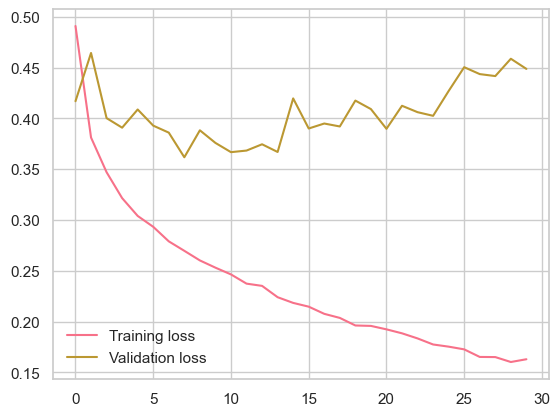

In [31]:
plt.plot(train_losses, label = "Training loss")
plt.plot(test_losses, label = "Validation loss")
plt.legend(frameon = False)

In [32]:
print("My model: \n\n", model, "\n")
print("The state dict keys: \n\n", model.state_dict().keys())

My model: 

 Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
  (3): LogSoftmax(dim=1)
) 

The state dict keys: 

 odict_keys(['0.weight', '0.bias', '2.weight', '2.bias'])


In [33]:
torch.save(model.state_dict(), 'checkpoint.pth')

A jakie inne sieci i warstwy możemy wykorzystać do analizy danych nieustrukturyzowanych? 

> Znajdź odpowiedź na to pytanie w dokumentacji biblioteki PyTorch.

## Dane tekstowe i model Worka słów 

In [35]:
import pandas as pd
df_train = pd.read_csv("train.csv")
df_train = df_train.drop("index", axis=1)
print(df_train.head())
print(np.bincount(df_train["label"]))

                                                text  label
0  When we started watching this series on cable,...      1
1  Steve Biko was a black activist who tried to r...      1
2  My short comment for this flick is go pick it ...      1
3  As a serious horror fan, I get that certain ma...      0
4  Robert Cummings, Laraine Day and Jean Muir sta...      1
[17452 17548]


In [36]:
# BoW model  - wektoryzator z sklearn
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(lowercase=True, max_features=10_000, stop_words="english")

cv.fit(df_train["text"])

CountVectorizer(max_features=10000, stop_words='english')

In [43]:
# słownik i nasze zmienne ..
print(list(cv.vocabulary_.keys())[:10])
print(list(cv.vocabulary_.values())[:10])

['started', 'watching', 'series', 'cable', 'idea', 'hate', 'character', 'hold', 'beautifully', 'developed']
[8515, 9725, 7957, 1320, 4488, 4191, 1544, 4339, 892, 2574]


In [44]:
X_train = cv.transform(df_train["text"])

In [45]:
# to dense matrix
feat_vec = np.array(X_train[0].todense())[0]
print(feat_vec.shape)
np.bincount(feat_vec)

(10000,)


array([9926,   67,    5,    0,    1,    0,    1])

## Obiektowe podejście do modelowania

In [46]:
import pandas as pd
import numpy as np
 
# przykład danych ustrukturyzowanych
df = pd.read_csv("students.csv")
df.head()

,sex,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,target
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,0


In [47]:
len(df), list(df.columns)

(99,
 ['sex',
  'race/ethnicity',
  'parental level of education',
  'lunch',
  'test preparation course',
  'math score',
  'reading score',
  'writing score',
  'target'])

In [48]:
X = df.drop(columns=['target'])
y = df['target']

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# ZAMIAST OD RAZU PRZETWARZAC !!! najpierw przygotuj kroki - pipeline

numeric_features = ['math score','reading score','writing score']
categorical_features = ['sex','race/ethnicity','parental level of education','lunch','test preparation course']

In [50]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [51]:
preprocessor = ColumnTransformer(transformers=[
    ("num_trans", numeric_transformer, numeric_features),
    ("cat_trans", categorical_transformer, categorical_features)
])

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[
    ("preproc", preprocessor),
    ("model", LogisticRegression())
])

In [52]:
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num_trans',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['math score',
                                                   'reading score',
                                                   'writing score']),
                                                 ('cat_trans',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'race/ethnicity',
                                                   'parental level of '
                                                   'education',
                                                   'lunch',
                                                   'test preparation '
                                                   'course'])])),
                ('model', LogisticRegression())])

> PAMIETAJ - obiekt pipeline to obiekt pythonowy i tak jak obiekt modelu można go zapisać do pickla. 

In [53]:
from sklearn.model_selection import train_test_split
X_tr, X_test, y_tr, y_test = train_test_split(X,y,
test_size=0.2, random_state=42)

pipeline.fit(X_tr, y_tr)

score = pipeline.score(X_test, y_test)
print(score)

0.45


In [54]:
import joblib
joblib.dump(pipeline, 'your_pipeline.pkl')

['your_pipeline.pkl']

TU ZACZYNA SIĘ MAGIA OBIEKTOWEGO PYTHONA - nie pisz kodu i nie uruchamiaj kodów wiele razy dla różnych parametrów - niech Python zrobi to za Ciebie 

In [55]:
param_grid = [
              {"preproc__num_trans__imputer__strategy":
              ["mean","median"],
               "model__n_estimators":[2,5,10,100,500],
               "model__min_samples_leaf": [1, 0.1],
               "model":[RandomForestClassifier()]},
              {"preproc__num_trans__imputer__strategy":
                ["mean","median"],
               "model__C":[0.1,1.0,10.0,100.0,1000],
                "model":[LogisticRegression()]}
]

from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(pipeline, param_grid,
cv=2, verbose=1, n_jobs=-1)


grid_search.fit(X_tr, y_tr)

grid_search.best_params_

Fitting 2 folds for each of 30 candidates, totalling 60 fits


{'model': RandomForestClassifier(),
 'model__min_samples_leaf': 0.1,
 'model__n_estimators': 500,
 'preproc__num_trans__imputer__strategy': 'median'}

In [56]:
grid_search.score(X_test, y_test), grid_search.score(X_tr, y_tr)

(0.5, 0.7341772151898734)

Teraz drobna modyfikacja - wiemy, że takiej zmiennej nie chcemy do modelu - ma tylko jedną wartość. 
Ale jak zweryfikować jakie to zmienne jeśli masz 3 mln kolumn? 


In [57]:
df['bad_feature'] = 1

In [58]:
X = df.drop(columns=['target'])
y = df['target']
X_tr, X_test, y_tr, y_test = train_test_split(X,y,
test_size=0.2, random_state=42)

In [59]:
numeric_features = ['math score','reading score','writing score', 'bad_feature']
# znajdz sposób na automatyczny podział dla zmiennych numerycznych i nienumerycznych

In [60]:
grid_search = GridSearchCV(pipeline, param_grid,
cv=2, verbose=1, n_jobs=-1)

grid_search.fit(X_tr, y_tr)

grid_search.best_params_

Fitting 2 folds for each of 30 candidates, totalling 60 fits


{'model': RandomForestClassifier(),
 'model__min_samples_leaf': 1,
 'model__n_estimators': 2,
 'preproc__num_trans__imputer__strategy': 'median'}

In [61]:
grid_search.score(X_tr, y_tr), grid_search.score(X_test, y_test)

(0.8227848101265823, 0.7)

### NAPISZ WŁASNĄ KLASĘ KTÓRA ZREALIZUJE TRNSFORMACJE ZA CIEBIE

In [62]:
# your own transformator class

from sklearn.base import BaseEstimator, TransformerMixin

class DelOneValueFeature(BaseEstimator, TransformerMixin):
    """Description"""
    def __init__(self):
        self.one_value_features = []
        
    def fit(self, X, y=None):
        for feature in X.columns:
            unique = X[feature].unique()
            if len(unique)==1:
                self.one_value_features.append(feature)
        return self
    def transform(self, X, y=None):
        if not self.one_value_features:
            return X
        return X.drop(axis='columns', columns=self.one_value_features)

In [64]:
# UTWÓRZ NOWY PIPELINE
pipeline2 = Pipeline([
    ("moja_transformacja",DelOneValueFeature()),
    ("preprocesser", preprocessor),
    ("classifier", LogisticRegression())])
    
pipeline2.fit(X_tr, y_tr)
score2 = pipeline2.score(X_test, y_test)
print(pipeline2)

Pipeline(steps=[('moja_transformacja', DelOneValueFeature()),
                ('preprocesser',
                 ColumnTransformer(transformers=[('num_trans',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['math score',
                                                   'reading score',
                                                   'writing score']),
                                                 ('cat_trans',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'race/ethnicity',
                                                   'parental level of '
          

🔍 Analiza zawartości laboratorium 4

1. Wprowadzenie do danych nieustrukturyzowanych

Laboratorium rozpoczyna się od przedstawienia danych nieustrukturyzowanych, takich jak obrazy, teksty, dźwięki czy wideo. Podkreślono, że niezależnie od typu danych, wszystko przetwarzane jest w tensorach (macierzach wielowymiarowych), co umożliwia wykorzystanie modeli uczenia maszynowego i sieci neuronowych do ich analizy.

2. Praca z obrazami

Ćwiczenia pokazują, jak za pomocą bibliotek NumPy i Matplotlib generować i wizualizować obrazy dwuwymiarowe. Następnie wprowadzono bibliotekę PyTorch i jej moduł torchvision do przetwarzania obrazów, w tym:
	•	Pobieranie i wczytywanie obrazów z internetu
	•	Transformacje obrazów (zmiana rozmiaru, przycinanie, normalizacja)
	•	Konwersja obrazów do tensorów
	•	Tworzenie batchy danych

3. Wykorzystanie pretrenowanych modeli

Laboratorium demonstruje, jak załadować i wykorzystać pretrenowany model AlexNet z biblioteki torchvision.models do klasyfikacji obrazów. Pokazano również, jak przygotować dane wejściowe i uzyskać predykcje z modelu.

4. Praca z danymi tekstowymi

W dalszej części laboratorium wprowadzono analizę danych tekstowych za pomocą modelu worka słów (bag-of-words). Pokazano, jak przekształcić teksty na reprezentacje numeryczne, które mogą być wykorzystane w modelach uczenia maszynowego.

5. Obiektowe podejście do modelowania

Na koniec laboratorium przedstawiono obiektowe podejście do tworzenia modeli w PyTorch, co jest istotne przy budowie bardziej złożonych architektur sieci neuronowych.

⸻

💡 Propozycje rozszerzeń

Aby jeszcze bardziej wzbogacić laboratorium 4, można rozważyć dodanie następujących elementów:

1. Wykorzystanie innych pretrenowanych modeli

Dodanie przykładów z wykorzystaniem innych pretrenowanych modeli, takich jak ResNet czy VGG, pozwoliłoby studentom porównać różne architektury i ich zastosowania.

2. Finałowy projekt integrujący obrazy i tekst

Zaproponowanie projektu, w którym studenci łączą analizę obrazów i tekstów (np. klasyfikacja memów), umożliwiłoby praktyczne zastosowanie zdobytej wiedzy.

3. Wprowadzenie do transfer learningu

Pokazanie, jak dostosować pretrenowane modele do nowych zadań poprzez transfer learning, przygotowałoby studentów do pracy z ograniczonymi zbiorami danych.

4. Analiza danych dźwiękowych

Dodanie sekcji dotyczącej analizy danych dźwiękowych (np. rozpoznawanie mowy) rozszerzyłoby zakres omawianych danych nieustrukturyzowanych.

5. Wykorzystanie bibliotek NLP

Wprowadzenie bibliotek takich jak spaCy czy Hugging Face Transformers do analizy tekstu pozwoliłoby na bardziej zaawansowane przetwarzanie języka naturalnego.

⸻

✅ Podsumowanie

Laboratorium 4 stanowi solidne wprowadzenie do analizy danych nieustrukturyzowanych z wykorzystaniem bibliotek NumPy i PyTorch. Dodanie powyższych rozszerzeń mogłoby jeszcze bardziej zwiększyć wartość edukacyjną zajęć, przygotowując studentów do realnych wyzwań w pracy z różnorodnymi danymi w kontekście Big Data.